#**NAME:SUJITHA ESTHER**
#**REG NO: 212224060266**

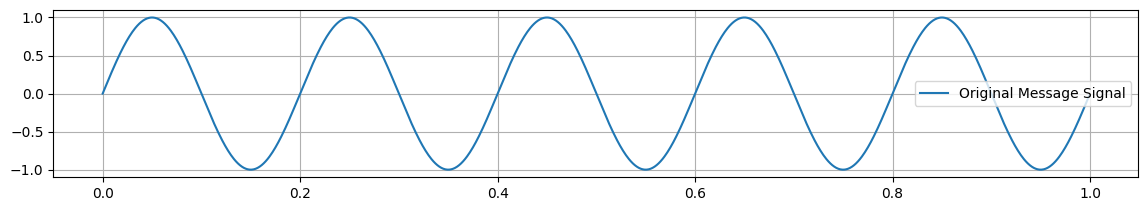

In [2]:
# #Natural sampling
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter

fs = 1000  # Sampling frequency (samples per second)
T = 1  # Duration in seconds
t = np.arange(0, T, 1/fs)  # Time vector
fm = 5  # Frequency of message signal (Hz)
message_signal = np.sin(2 * np.pi * fm * t)
pulse_rate = 50  # pulses per second
pulse_train = np.zeros_like(t)
pulse_width = int(fs / pulse_rate / 2)
for i in range(0, len(t), int(fs / pulse_rate)):
    pulse_train[i:i+pulse_width] = 1
nat_signal = message_signal * pulse_train
sampled_signal = nat_signal[pulse_train == 1]
sample_times = t[pulse_train == 1]

# # Interpolation - Zero-Order Hold (just for visualization)
reconstructed_signal = np.zeros_like(t)
for i, time in enumerate(sample_times):
    index = np.argmin(np.abs(t - time))
    reconstructed_signal[index:index+pulse_width] = sampled_signal[i]

def lowpass_filter(signal, cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return lfilter(b, a, signal)

reconstructed_signal = lowpass_filter(reconstructed_signal,10, fs)

plt.figure(figsize=(14, 10))

plt.subplot(4, 1, 1)
plt.plot(t, message_signal, label='Original Message Signal')
plt.legend()
plt.grid(True)
